# Solución de la PC2 del curso de Teoría de Control Automático - 2020
### Autor: Bregy Malpartida
Para la resolución del siguiente examen se uso python y las librerias control, numpy, sympy, *control2020.

(\*) la librería control2020 es un conjunto de funciones útiles para el diseño de diferentes tipos de controladores, es el resultado de la ejecución de varios algoritmos vistos en el curso ya mencionado (UTEC-2020), si se desea profundizar en las distintas implementaciones, estas se encuentran en el siguiente repositorio: https://github.com/bregydoc/controlsystems2020

---

In [61]:
import control as ct
import control2020 as ct20
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

s = sp.var("s") # symbolic variable to represent the laplace space

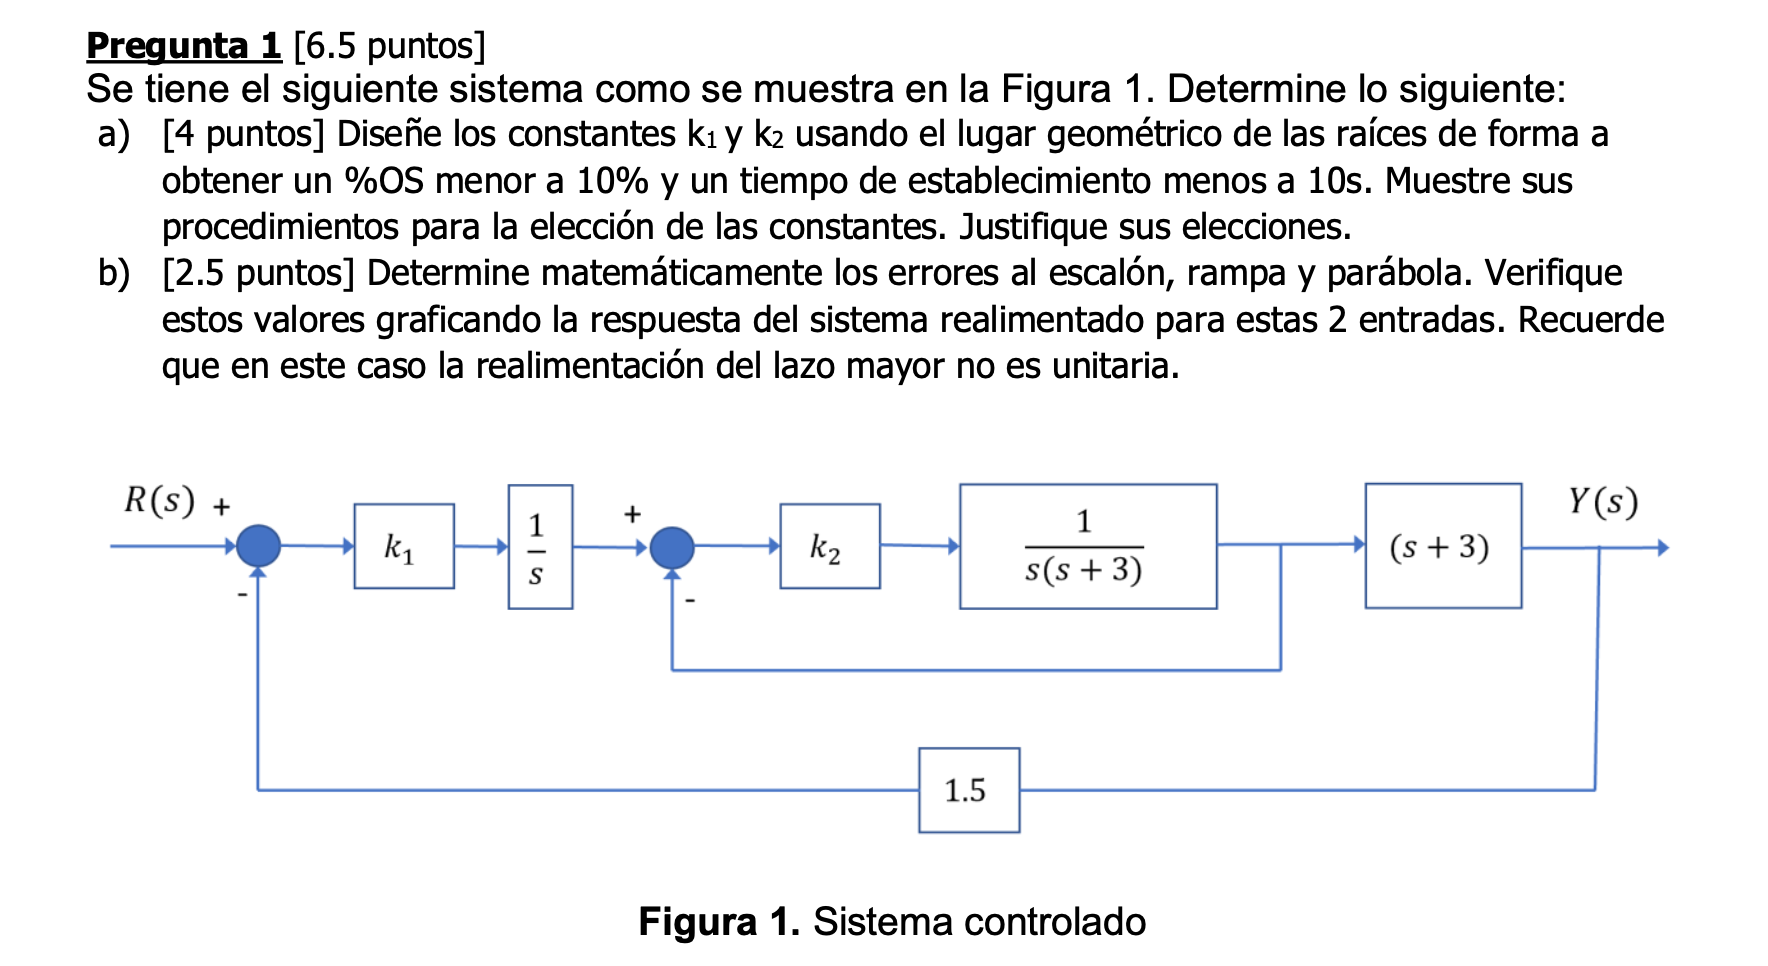

Lo primero que haré será simplificar el sistema interno

In [2]:
k1, k2 = sp.var("k_1 k_2")

In [25]:
inner_1 = k2/s/(s+3)
loop_1 = sp.simplify(inner_1/(1+inner_1))

inner_2 = sp.factor(k1/s*loop_1*(s+3))
inner_2

k_1*k_2*(s + 3)/(s*(k_2 + s**2 + 3*s))

$k_1$ y $k_2$ son constantes que deben de ser diseñadas en base a los parametros de calidad que nos piden: $PO = 10 \%$ y $Ts = 10$.

Debido a que la constante $k_2$ no puede salir del denominador, la estrategía para diseñar este controlador será fijar un valor para $k_2$ y posteriormente calcular $k_1$ usando el lugar geométrico de las raices.

Entonces,
$$ k_2 = 2 $$


Remplazando ese valor de $k_2$ obtenemos

In [34]:
fixed_k2 = inner_2.subs(k2, 2)
fixed_k2

2*k_1*(s + 3)/(s*(s**2 + 3*s + 2))

In [40]:
fixed_k2.subs(k1, 1)

2*(s + 3)/(s*(s**2 + 3*s + 2))

In [85]:
pre_g = ct20.core.symbolic_transfer_function(fixed_k2.subs(k1, 1))
a, b = ct.root_locus(pre_g, kvect=np.linspace(0, 30, 1000), Plot=False)

Critical gain K = 0.000 at 0.000 + 0.000i


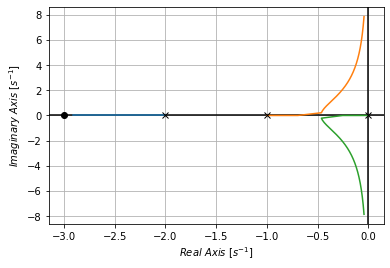

In [100]:
sys = pre_g

plt.xlabel("$Real\\ Axis\\ [s^{-1}]$")
plt.ylabel("$Imaginary\\ Axis\\ [s^{-1}]$")

range_space = np.linspace(0, 30, 1000)
paths, gains = ct.root_locus(sys, kvect=range_space, Plot=False)

for i, gain in enumerate(gains):
    points = paths[i]
    for point in points:
        if True and abs(point.real) < 0.001:
            print("Critical gain K = %.3f at %.3f + %.3fi" % (gain, point.real, point.imag))

plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.grid()

plt.plot(np.real(paths), np.imag(paths))

n_poles = sys.pole()
n_zeros = sys.zero()

plt.plot(np.real(n_poles), np.imag(n_poles), "kx")

plt.plot(np.real(n_zeros), np.imag(n_zeros), "ko")

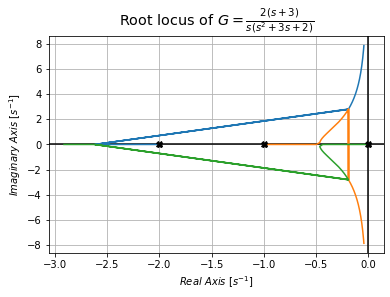

In [84]:
ct20.core.plot_root_locus(fixed_k2.subs(k1, 1), kf=30, points=4000)

In [27]:
# De los requerimientos, usaremos PO = 8% y Ts = 8s
po = 8
ts = 8

In [29]:
psi, wn = ct20.core.from_quality_to_psi_wn(po, ts)
print(f"psi= {psi} | ws= {wn}")

psi= 0.6265771868559205 | ws= 0.7979862824386128


In [96]:
sp.Poly(s)

Poly(s, s, domain='ZZ')

In [ ]:
# loop_2 = sp.simplify(inner_2/(1+1.5*inner_2))